# Ivan Vazquez

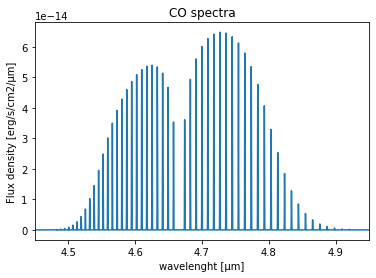

In [7]:
import numpy as np
import matplotlib.pyplot as plt


##You used the file named something 117

file = open('/Users/User/Downloads/dump_spectra_IV.dat')
list = []

for line in file:
    list += [line.split()]

wavel= [x[0] for x in list]   #wavelength list 

fd = [x[1] for x in list]     #flux density list

FD=fd[2:]                    #cutting the list to only contain floats
wav=wavel[2:]

FD_array = np.array(FD).astype(np.float)      #making them into an array
wav_array = np.array(wav).astype(np.float)



#print(FD,wav)
#print(len(wav),len(wavel))

        
plt.plot(wav_array,FD_array) #plotting the arrays #low 4.44 high 4.95
plt.title('CO spectra')
plt.xlabel('wavelenght [µm]')
plt.ylabel('Flux density [erg/s/cm2/µm]')
plt.xlim(4.45,4.95)
plt.show()


#print(list)

In [2]:
i=0
j=0
F=[]
f=0

FD_rng=[] #range of fd to find max point, used in the loop. 

Max_fd=[]

while i<len(FD_array):

    if FD_array[i] >10e-17:                 #value that serves as the zero
        
        f=FD_array[i]*wav_array[i]+f        #numerical integration 
        FD_rng.append(FD_array[i])
        
    else:
        if f>10e-17:
            max=np.amax(FD_rng)            #finds max value in flux range 
            F.append(f)
            Max_fd.append(max)             #makes a list of only those max fluxes 
            FD_rng=[]
        f=0
    
    i=i+1
    f=f

In [8]:
FD_list=FD_array.tolist() #original list had strings 

index_list=[]

for i in Max_fd:     #already a list
    inx=FD_list.index(i)
    index_list.append(inx)
    
peak_wav=[]    

    
for i in index_list:      
    winx=wav_array[i]
    peak_wav.append(winx)

peak_wav_array= np.array(peak_wav).astype(np.float)  
F_array= np.array(F).astype(np.float)       

In [9]:
#In this part youll create a graph and apply a linear fit to it. 
#First import the second file
#parameters of interest

# A_ul,  Einstein A coefficient for the upper level 
#the statistical weight (g_up)
#you calulate the line energy
#the energy of the upper level (E_up)


In [10]:
print('line flux:',F,'\n')
print('peak wavelength:',peak_wav_array)

line flux: [7.755214961799999e-15, 2.3616268871999998e-14, 4.87849743186e-14, 9.28104669066e-14, 1.669306657896e-13, 2.8705714842e-13, 4.72946517219e-13, 7.446270025812e-13, 1.1175314992010001e-12, 1.5908424379017999e-12, 2.1464420981924e-12, 2.7437721464677996e-12, 3.3343026436752013e-12, 3.879843109744801e-12, 4.3634358113110004e-12, 4.786055275924401e-12, 5.155294794522404e-12, 5.4715169575511985e-12, 5.735587077808199e-12, 5.943501553229999e-12, 6.086382965706e-12, 6.1486042611546015e-12, 6.102544903245002e-12, 5.891308139234399e-12, 5.378740559949999e-12, 4.082115524458598e-12, 4.201211785343999e-12, 5.758372298681199e-12, 6.5640128652352016e-12, 7.069663571182001e-12, 7.402612069635997e-12, 7.609070346730796e-12, 7.70765833684e-12, 7.704340846174601e-12, 7.594171923294596e-12, 7.369877297456198e-12, 7.008335104844397e-12, 6.490812236632799e-12, 5.804356050592002e-12, 4.970478095708402e-12, 4.047564070271199e-12, 3.1269960928173998e-12, 2.2893655516712e-12, 1.5940738693462e-12, 1.

In [11]:
file2 = open('/Users/User/Downloads/dump_lines_001_IV.dat') #Uploading second file, a catalog of wavelenths 
list2 = []

for line in file2:
    list2 += [line.split()]

52 52 52 52


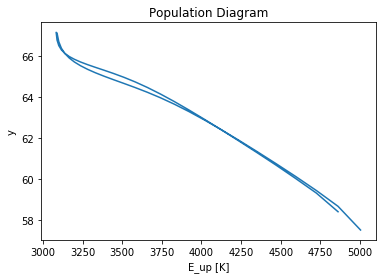

In [14]:
## 2;lambda, 4;intensity, 5;A_ul, 6;E_up, 7;g_up


lamb= [x[2] for x in list2]       #wavelength units microns 
aul= [x[5] for x in list2]    
eup= [x[6] for x in list2]     
gup= [x[7] for x in list2]     
           
#cutting the list to only contain floats

wav2=lamb[1:]
A_ul=aul[1:]
E_up=eup[1:]
g_up=gup[1:]

wav2_array=np.array(wav2).astype(np.float)          #making them into an array   
A_ul_array=np.array(A_ul).astype(np.float)
E_up_array=np.array(E_up).astype(np.float)  
g_up_array=np.array(g_up).astype(np.float)

def closest(wav2, i):                      #function that finds the clossest value to the peak wavelenghts in the catalog
    idx = (np.abs(wav2 - i)).argmin() 
    return idx 


cat_wav=[]   #list of catalog peak wavelengths    
cat_A_ul=[]
cat_E_up=[]
cat_g_up=[]

for i in peak_wav_array:
    j=closest(wav2_array,i)  #finds the indexes where the closest value is located
    
    cat_wav.append(wav2_array[j])
    cat_A_ul.append(A_ul_array[j])
    cat_E_up.append(E_up_array[j])
    cat_g_up.append(g_up_array[j])
    
    
cat_wav_array=np.array(cat_wav).astype(np.float)          #making them into an array again   
cat_A_ul_array=np.array(cat_A_ul).astype(np.float)
cat_E_up_array=np.array(cat_E_up).astype(np.float)           #x value in grapth
cat_g_up_array=np.array(cat_g_up).astype(np.float)   

###Calcultaions and plotting of population diagram 

c=3e8            #speed of light
h=6.626e-34      #plack's constant

print(len(F_array),len(cat_wav_array),len(cat_g_up_array),len(cat_A_ul_array))

y_val=np.log((4*np.pi*F_array*c)/(h*cat_wav_array*cat_A_ul_array*cat_g_up_array))

plt.plot(cat_E_up_array,y_val)
plt.xlabel('E_up [K]')
plt.ylabel('y')
plt.title('Population Diagram')
plt.show()

#Flux has units [erg/s/cm2]
#wavelength has units [mincron]
#E_up has units K

In [10]:
#y_val

In [11]:
from sklearn.linear_model import LinearRegression

cat_E_up_reshaped=cat_E_up_array.reshape((-1, 1))

#cat_E_up_reshaped

In [12]:
model = LinearRegression().fit(cat_E_up_reshaped,y_val)

r_sq = model.score(cat_E_up_reshaped,y_val)
print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

coefficient of determination: 0.9861465774626345
intercept: 79.93770886245
slope: [-0.00431743]


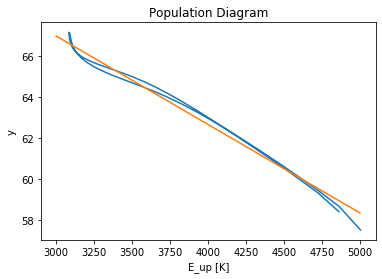

In [22]:
x= np.arange(3000,5001,1)  
y=(-0.00431743*x)+79.9377


plt.xlabel('E_up [K]')
plt.ylabel('y')
plt.title('Population Diagram')
data=plt.plot(cat_E_up_array,y_val)
linearfit=plt.plot(x,y)

In [17]:
print('Temperature of CO cloud:',-1/model.coef_,'K')

Temperature of CO cloud: [231.61940157] K
